In [ ]:
#Mounting the drive to use all the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install ts2vg
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 20.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 19.5 MB/s 


In [ ]:
#import all the required modules
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=RuntimeWarning)
import pandas as pd
from ts2vg import NaturalVG, HorizontalVG
import igraph as ig
import numpy as np
import seaborn as sns
from google.colab import files

In [ ]:
#Function to create visualization graphs for both horizontal and natural visibility.
def Create_Visualization_Graph(df,axis,Visualization_type):
    if Visualization_type=="HVG":
        axis="attr_"+axis
        g=HorizontalVG()
        g.build(df[axis][1000:2024])
        hvg=g.as_igraph()
        return ["HVG",np.mean(hvg.degree()),hvg.diameter(),hvg.average_path_length()]
    elif Visualization_type=="NVG":
        axis="attr_"+axis
        g=NaturalVG()
        g.build(df[axis][1000:2024])
        nvg=g.as_igraph()
        return ["NVG",np.mean(nvg.degree()),nvg.diameter(),nvg.average_path_length()]

#Function to generate output dataframe
def Create_Output_Table(body_part):
    path = ""                                                                   #To read path of the every datafile from drive
    num_of_subjects = 15
    Activity = ["Walking","Running","Climbing Up", "Climbing Down"]
    
    axis = ["x","y","z"]

    out_df = {'Method': [],
            'Subject': [],
            'Accelorometer Axis':[],
            'Average Degree':[],
            'Network Diameter':[],
            'Average Path Length':[],
            'Activity':[],
            'Body Part':[]}
  
    result = pd.DataFrame(out_df)

    for i in range(1, num_of_subjects + 1):
        for j in Activity:
            #Automating the dataset upload by following particular naming convention 
            path="/content/drive/MyDrive/TimeSeriesAnalysisProject-main/Subject "+str(i)+"/"+j+"/acc_"+j.lower().replace(" ","")+"_"+body_part+".csv"  
            df=pd.read_csv(path)
            for k in axis:
                NVG_df = Create_Visualization_Graph(df,k,"NVG")                 #Calling for NVG and store the return result in a dataframe
                HVG_df = Create_Visualization_Graph(df,k,"HVG")                 #Calling for HVG and store the return result in a dataframe
                df2= {'Method': "NVG",
                    'Subject': i,
                    'Accelorometer Axis':k,
                    'Average Degree':NVG_df[1],                        
                    'Network Diameter':NVG_df[2],
                    'Average Path Length':NVG_df[3],
                    'Activity':j,
                    'Body Part':body_part}
                
                df3= {'Method': "HVG",
                    'Subject': i,
                    'Accelorometer Axis':k,
                    'Average Degree':HVG_df[1],
                    'Network Diameter':HVG_df[2],
                    'Average Path Length':HVG_df[3],
                    'Activity':j,
                    'Body Part':body_part}
                result = result.append(df2,ignore_index=True)
                result = result.append(df3,ignore_index=True)
    display(result)
    return result

**CHEST**

In [ ]:
df = {'Method': [],
            'Subject': [],
            'Accelorometer Axis':[],
            'Average Degree':[],
            'Network Diameter':[],
            'Average Path Length':[],
            'Activity':[],
            'Body Part':[]}
  
    
result = pd.DataFrame(df)
result = Create_Output_Table(body_part="chest")
result.to_csv("accelerometer_result_visibility_graph_chest.csv")                #Storing the result as a csv and downloading the csv file to retrieve and access the file quickly
files.download("accelerometer_result_visibility_graph_chest.csv")

In [ ]:
#As the computation time is more, using the above computed csv
from google.colab import files
uploaded = files.upload()

Saving accelerometer_result_visibility_graph_chest.csv to accelerometer_result_visibility_graph_chest (1).csv


In [ ]:
dfw=pd.read_csv("accelerometer_result_visibility_graph_chest.csv")
x_axis_HVG1=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='x') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_NVG1=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='x') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_HVG2=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='x') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
x_axis_NVG2=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='x') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_HVG1=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='y') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_NVG1=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='y') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_HVG2=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='y') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_NVG2=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='y') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_HVG1=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='z') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_NVG1=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='z') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_HVG2=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='z') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_NVG2=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='z') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

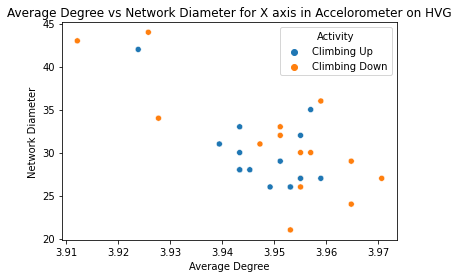

In [ ]:
plt1=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = x_axis_HVG1)
plt1.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

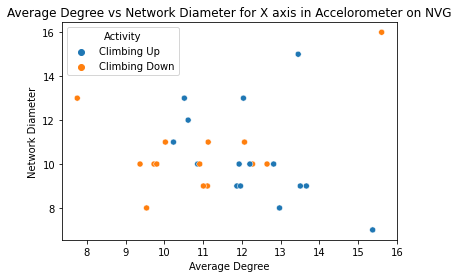

In [ ]:
plt2=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = x_axis_NVG1)
plt2.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

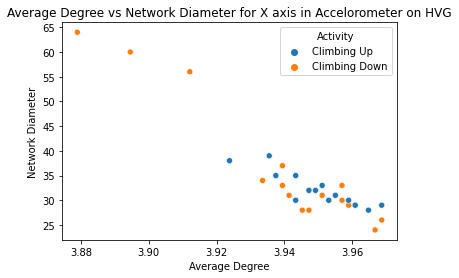

In [ ]:
plt3=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = y_axis_HVG1)
plt3.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

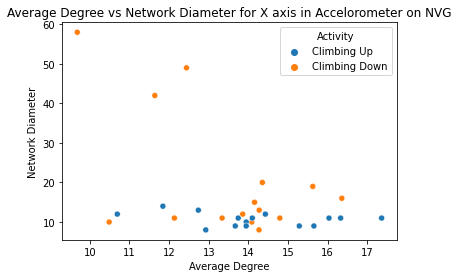

In [ ]:
plt4=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = y_axis_NVG1)
plt4.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

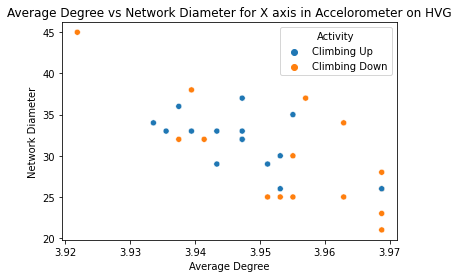

In [ ]:
plt5=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = z_axis_HVG1)
plt5.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

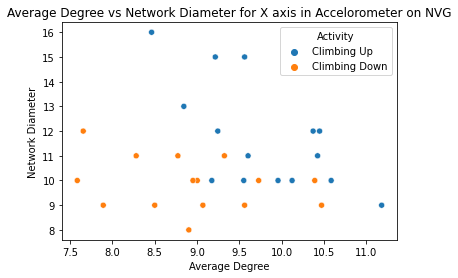

In [ ]:
plt6=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = z_axis_NVG1)
plt6.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

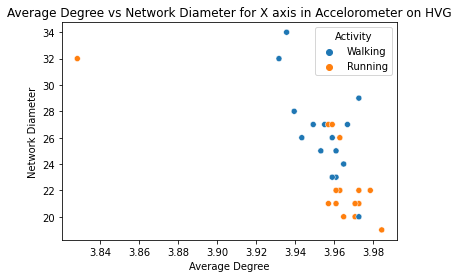

In [ ]:
plt7=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = x_axis_HVG2)
plt7.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

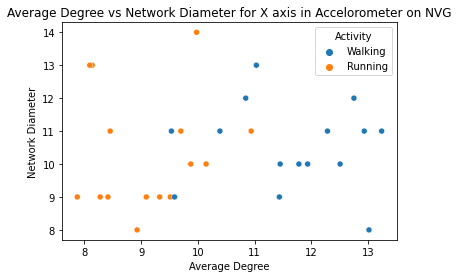

In [ ]:
plt8=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = x_axis_NVG2)
plt8.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

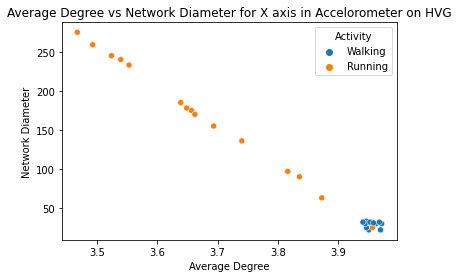

In [ ]:
plt9=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = y_axis_HVG2)
plt9.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

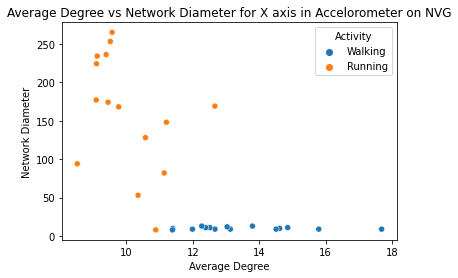

In [ ]:
plt10=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = y_axis_NVG2)
plt10.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

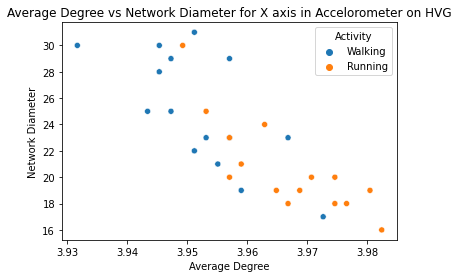

In [ ]:
plt11=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = z_axis_HVG2)
plt11.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

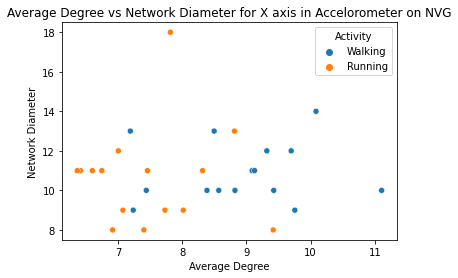

In [ ]:
plt12=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = z_axis_NVG2)
plt12.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

**HEAD**

In [ ]:
df = {'Method': [],
            'Subject': [],
            'Accelorometer Axis':[],
            'Average Degree':[],
            'Network Diameter':[],
            'Average Path Length':[],
            'Activity':[],
            'Body Part':[]}
  
    
result = pd.DataFrame(df)
result = Create_Output_Table(body_part="head")
result.to_csv("accelerometer_result_visibility_graph_head.csv")                     #storing into csv for further access
files.download("accelerometer_result_visibility_graph_head.csv")

,Method,Subject,Accelorometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
0,NVG,1.0,x,12.492188,11.0,4.518703,Walking,head
1,HVG,1.0,x,3.949219,35.0,16.403747,Walking,head
2,NVG,1.0,y,13.187500,9.0,4.281492,Walking,head
3,HVG,1.0,y,3.966797,24.0,10.074499,Walking,head
4,NVG,1.0,z,12.974609,13.0,5.146120,Walking,head
...,...,...,...,...,...,...,...,...
355,HVG,15.0,x,3.953125,28.0,12.069881,Climbing Down,head
356,NVG,15.0,y,14.203125,11.0,4.388028,Climbing Down,head
357,HVG,15.0,y,3.939453,34.0,14.328954,Climbing Down,head
358,NVG,15.0,z,11.107422,10.0,4.887433,Climbing Down,head


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#uploading the above result file
from google.colab import files
uploaded = files.upload()

Saving accelerometer_result_visibility_graph_head.csv to accelerometer_result_visibility_graph_head.csv


In [ ]:
dfw=pd.read_csv("accelerometer_result_visibility_graph_head.csv")
x_axis_HVG1=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='x') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_NVG1=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='x') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_HVG2=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='x') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
x_axis_NVG2=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='x') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_HVG1=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='y') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_NVG1=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='y') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_HVG2=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='y') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_NVG2=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='y') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_HVG1=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='z') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_NVG1=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='z') & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_HVG2=dfw.loc[(dfw['Method']=='HVG') & (dfw['Accelorometer Axis']=='z') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_NVG2=dfw.loc[(dfw['Method']=='NVG') & (dfw['Accelorometer Axis']=='z') & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

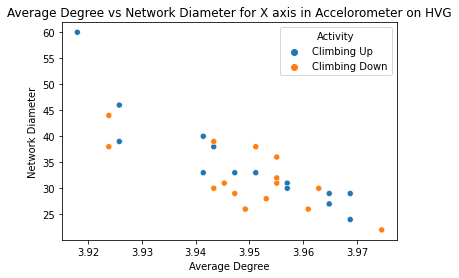

In [ ]:
plt1=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = x_axis_HVG1)
plt1.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

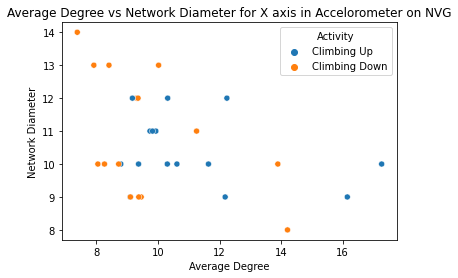

In [ ]:
plt2=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = x_axis_NVG1)
plt2.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

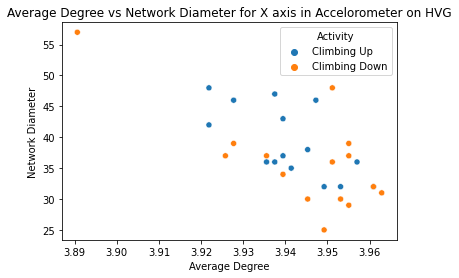

In [ ]:
plt3=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = y_axis_HVG1)
plt3.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

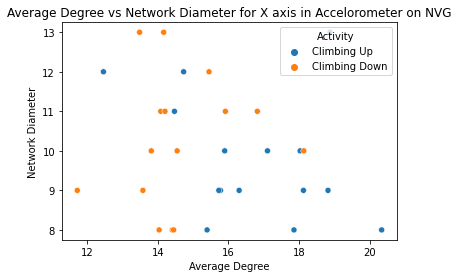

In [ ]:
plt4=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = y_axis_NVG1)
plt4.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

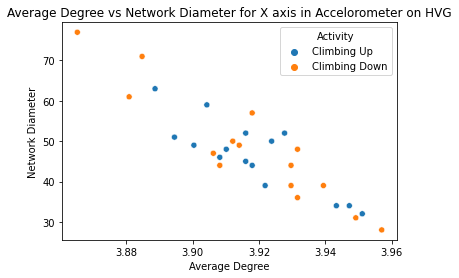

In [ ]:
plt5=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = z_axis_HVG1)
plt5.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

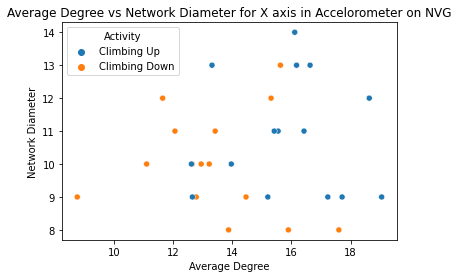

In [ ]:
plt6=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = z_axis_NVG1)
plt6.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

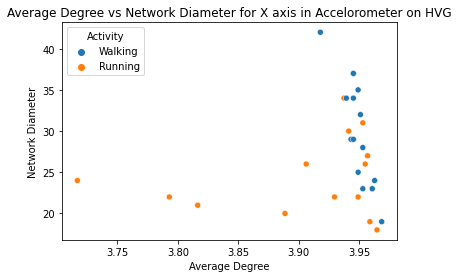

In [ ]:
plt7=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = x_axis_HVG2)
plt7.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

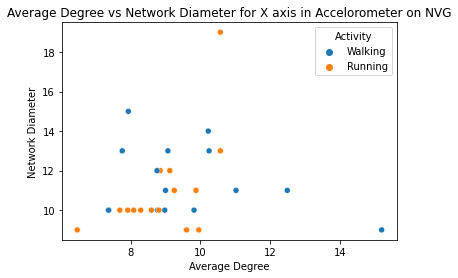

In [ ]:
plt8=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = x_axis_NVG2)
plt8.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

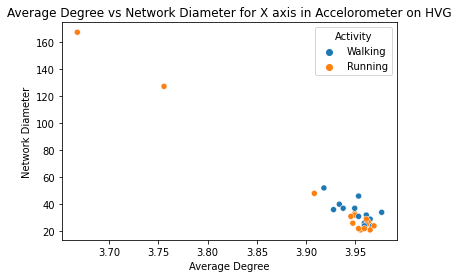

In [ ]:
plt9=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = y_axis_HVG2)
plt9.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

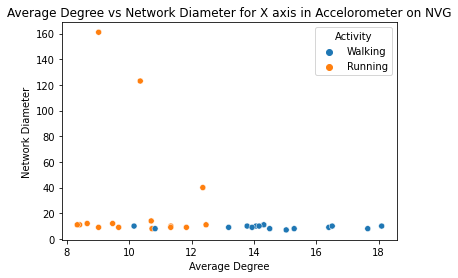

In [ ]:
plt10=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = y_axis_NVG2)
plt10.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on HVG')

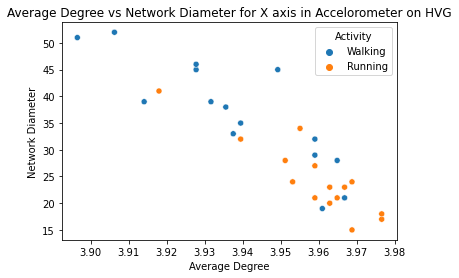

In [ ]:
plt11=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = z_axis_HVG2)
plt11.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on HVG")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer on NVG')

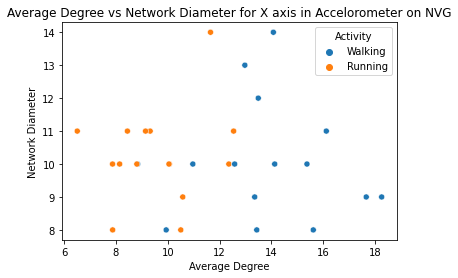

In [ ]:
plt12=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data = z_axis_NVG2)
plt12.set_title("Average Degree vs Network Diameter for X axis in Accelorometer on NVG")

**Task 2: Permutation Entropy and Complexity**

In [ ]:
!pip install ordpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The below code calculates permutation entroy and complexity for each signal length. I do not reccomend to run the below cell as it takes 30 minutes on average to create the full dataset. 
Please see "Accelrometer_Entropy_Complexity_Data_Subjects-chest.csv" file to view the dataset generated from the below cell.
thank you. 

In [ ]:
#Below code for Permutation Entropy and Complexity by Prof Srinivasan Radakrishnan from github
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''

 

def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

#End of sir code

#defing function to use all the above defined function to calculate entropy
def perm_complexity_entropy(df,dim,delay):
    ord_pat = ordinal_patterns(df,dim,delay)
    perm_entr = p_entropy(ord_pat)
    comp = complexity(ord_pat)
    return (perm_entr,comp)
    

def create_output_table1(body_part):
    no_of_subjects = 15
    path = ""                                                               
    axis = ["x","y","z"]
    Activity = ["Walking","Running","Climbing Up", "Climbing Down"]

    out_df = {'Subject': [],
            'Accelorometer Axis':[],
            'Signal Length':[],
            'Dimension':[],
            'Delay':[],
            'Permutation Entropy':[],
            'Complexity':[],
            'Activity':[],
            'Body Part':[]}

    result = pd.DataFrame(out_df)

    for i in range(1,no_of_subjects+1):
        for j in Activity:
            #Automating the read of csv files 
            path="/content/drive/MyDrive/TimeSeriesAnalysisProject-main/Subject "+str(i)+"/"+j+"/acc_"+j.lower().replace(" ","")+"_"+body_part+".csv"  
            df=pd.read_csv(path)  
            for k in axis:
                dim = [3,4,5,6]
                delay = [1,2,3]
                sig_length = [1024,2048,4096]
                for d in dim:
                    for de in delay:
                        for sig in sig_length:
                                length = 0
                                opt = int(len(df)/sig)
                                #this loop is used to consider or feed the entire dataset with the dataframe length as sig_length
                                for s in range(1,opt):                              
                                    a="attr_"+k
                                    entrop = perm_complexity_entropy(df[a][length:length+sig],d,de)
                                    dfw = {'Subject': i,
                                        'Accelorometer Axis':k,
                                        'Signal Length':sig,
                                        'Dimension':d,
                                        'Delay':de,
                                        'Permutation Entropy':list(entrop)[0],
                                        'Complexity':list(entrop)[1],
                                        'Activity':j,
                                        'Body Part':body_part}
                                    result=result.append(dfw,ignore_index=True)
                                    length=length+sig
    display(result)
    return result

**CHEST**

In [ ]:
#since the computation time for above cell is more storing the result into a csv to access further
result=create_output_table1("chest")
result.to_csv("accelerometer_entropy_complexity_result_chest.csv")
result=result.dropna()
files.download("accelerometer_entropy_complexity_result_chest.csv")

,Subject,Accelorometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,Body Part
0,1.0,x,1024.0,3.0,1.0,0.855987,0.119191,Walking,chest
1,1.0,x,1024.0,3.0,1.0,0.831743,0.136355,Walking,chest
2,1.0,x,1024.0,3.0,1.0,0.818490,0.145093,Walking,chest
3,1.0,x,1024.0,3.0,1.0,0.810816,0.150244,Walking,chest
4,1.0,x,1024.0,3.0,1.0,0.807199,0.152708,Walking,chest
...,...,...,...,...,...,...,...,...,...
98275,15.0,z,4096.0,6.0,3.0,0.962741,0.085106,Climbing Down,chest
98276,15.0,z,4096.0,6.0,3.0,0.954761,0.100891,Climbing Down,chest
98277,15.0,z,4096.0,6.0,3.0,0.951974,0.106408,Climbing Down,chest
98278,15.0,z,4096.0,6.0,3.0,0.955139,0.098146,Climbing Down,chest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#uploading the above result csv 
from google.colab import files
uploaded = files.upload()

Saving accelerometer_entropy_complexity_result_chest.csv to accelerometer_entropy_complexity_result_chest (1).csv


In [ ]:
dfw = pd.read_csv("accelerometer_entropy_complexity_result_chest.csv")

#For Activity Climbing up and Climbing down
x_axis_c_1=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_c_2=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_c_3=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_c_4=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_c_1=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_c_2=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_c_3=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_c_4=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_c_1=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_c_2=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_c_3=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_c_4=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]

#For Activity walking and running
x_axis_wr_1=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
x_axis_wr_2=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
x_axis_wr_3=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
x_axis_wr_4=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_wr_1=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_wr_2=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_wr_3=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_wr_4=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_wr_1=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_wr_2=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_wr_3=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_wr_4=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

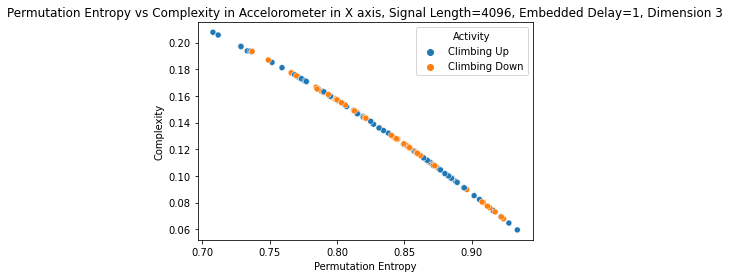

In [ ]:
import seaborn as sns
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_c_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

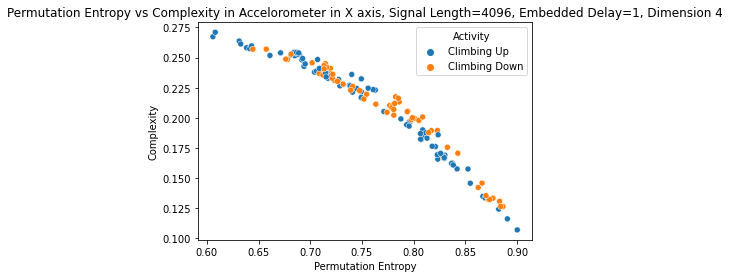

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_c_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

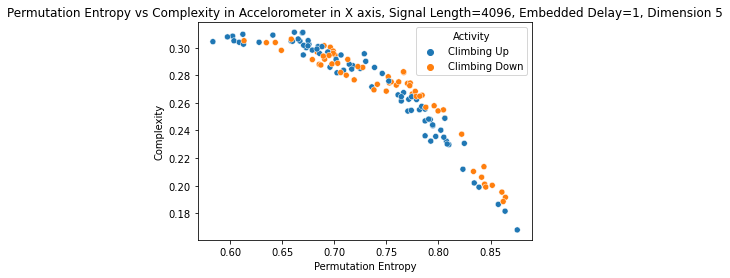

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_c_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

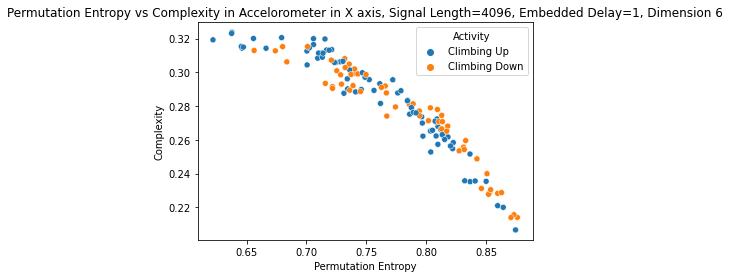

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_c_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

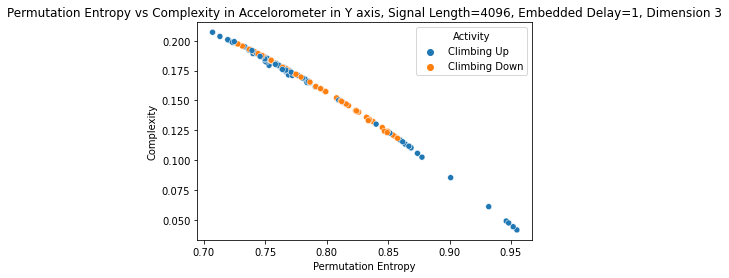

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_c_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

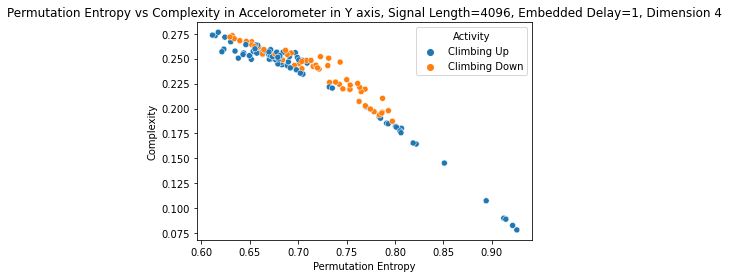

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_c_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

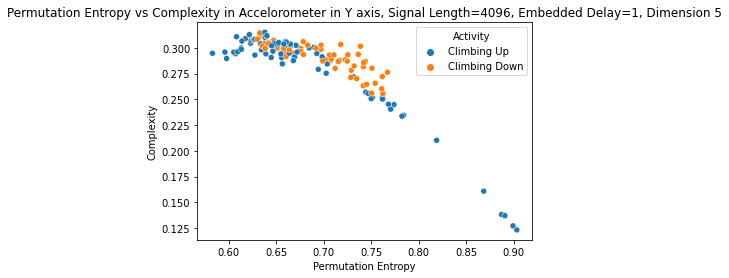

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_c_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

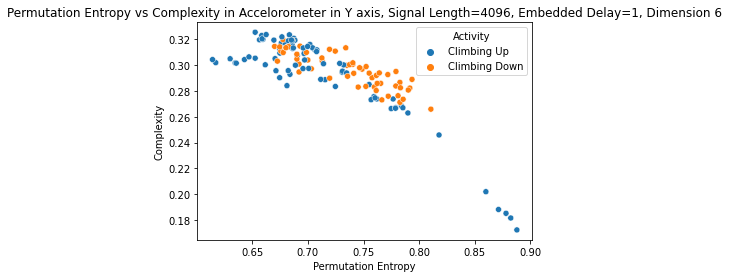

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_c_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

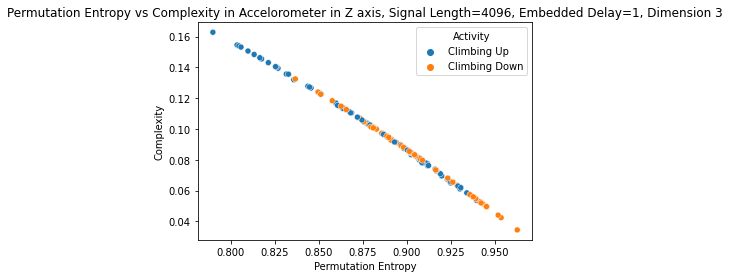

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_c_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

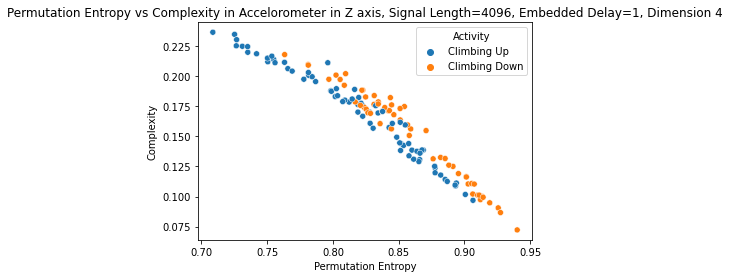

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_c_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

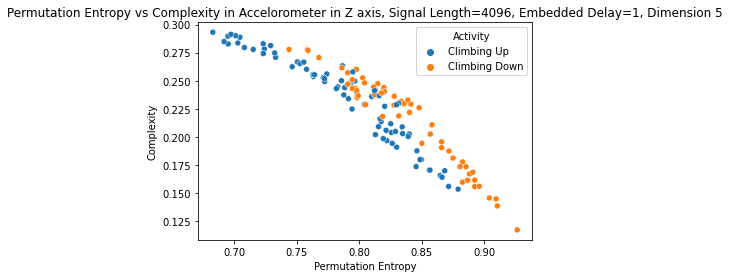

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_c_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

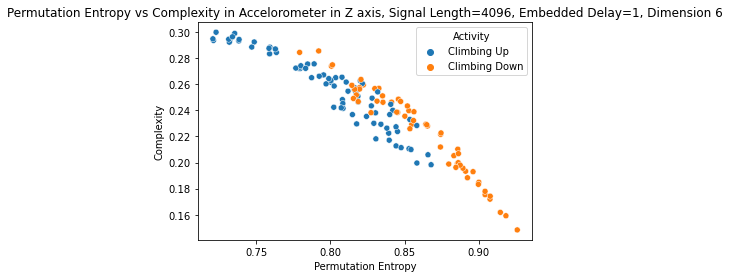

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_c_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

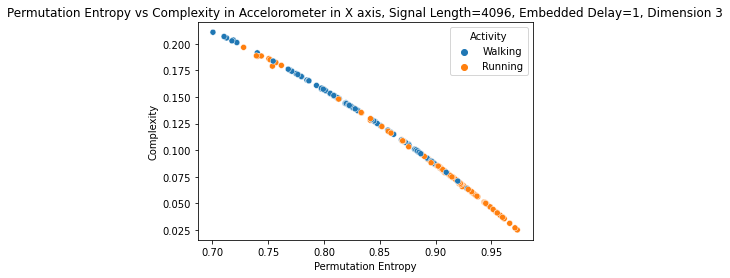

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_wr_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

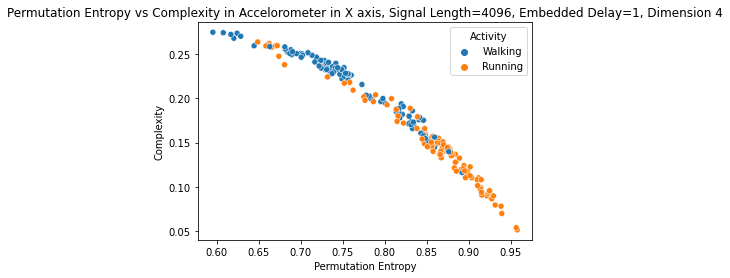

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_wr_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

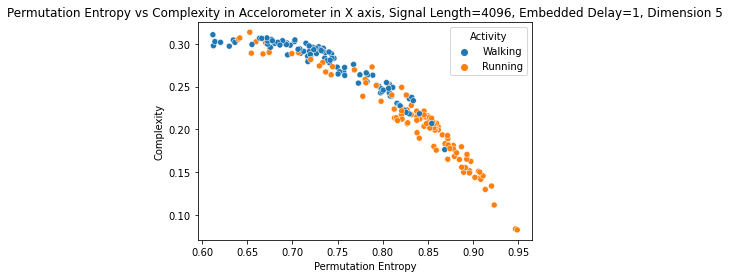

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_wr_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

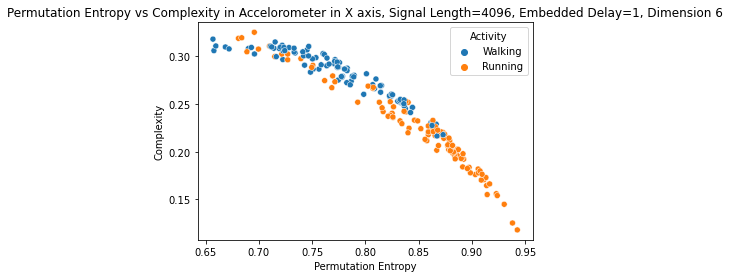

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_wr_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

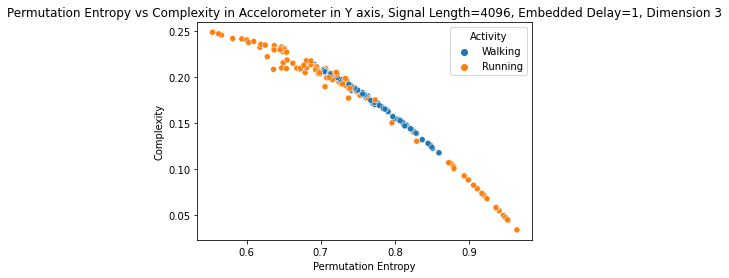

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_wr_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

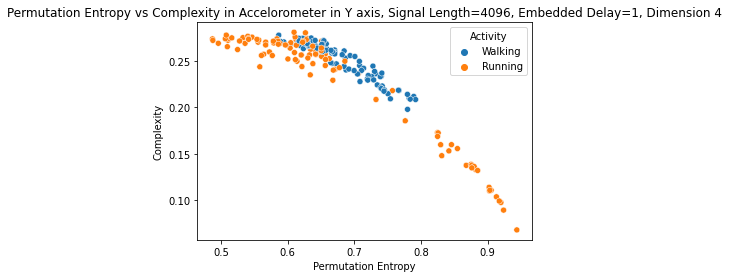

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_wr_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

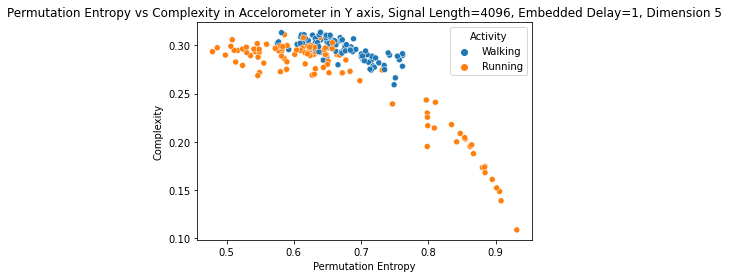

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_wr_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

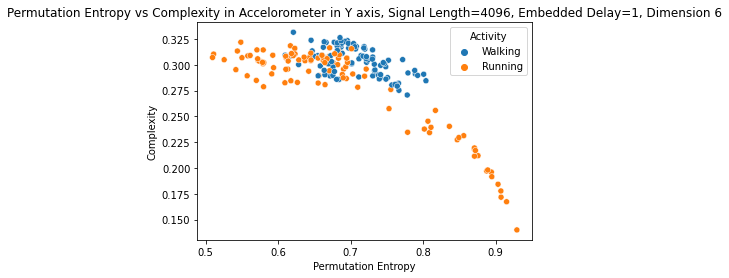

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_wr_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

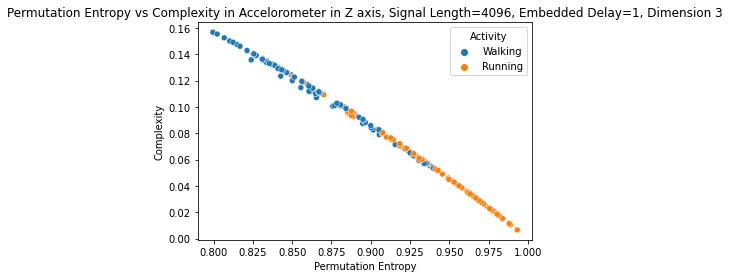

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_wr_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

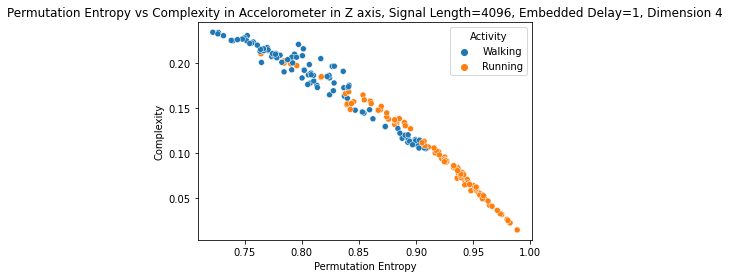

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_wr_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

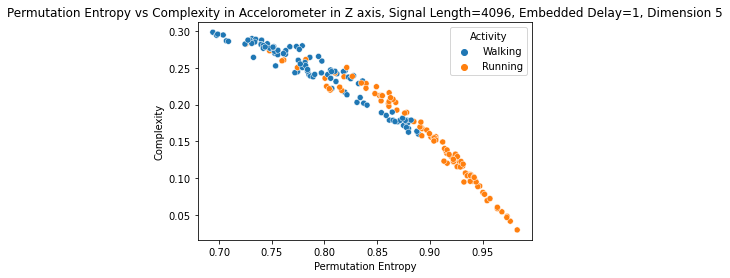

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_wr_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

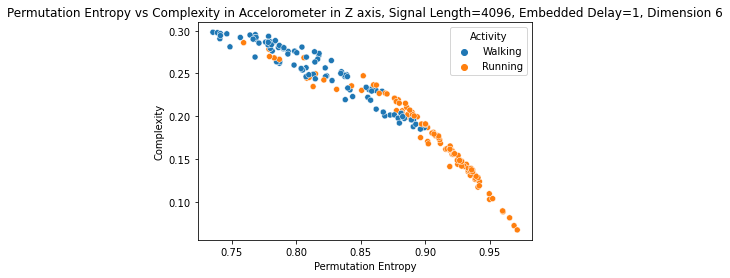

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_wr_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

**HEAD**

In [ ]:
result=create_output_table1("head")
result.to_csv("accelerometer_entropy_complexity_result_head.csv")
result=result.dropna()
files.download("accelerometer_entropy_complexity_result_head.csv")

,Subject,Accelorometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,Body Part
0,1.0,x,1024.0,3.0,1.0,0.775745,0.171051,Walking,head
1,1.0,x,1024.0,3.0,1.0,0.844206,0.126959,Walking,head
2,1.0,x,1024.0,3.0,1.0,0.801749,0.154678,Walking,head
3,1.0,x,1024.0,3.0,1.0,0.796385,0.154013,Walking,head
4,1.0,x,1024.0,3.0,1.0,0.787629,0.157538,Walking,head
...,...,...,...,...,...,...,...,...,...
98275,15.0,z,4096.0,6.0,3.0,0.916985,0.158047,Climbing Down,head
98276,15.0,z,4096.0,6.0,3.0,0.910448,0.171519,Climbing Down,head
98277,15.0,z,4096.0,6.0,3.0,0.908417,0.171686,Climbing Down,head
98278,15.0,z,4096.0,6.0,3.0,0.913128,0.169831,Climbing Down,head


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#uploading the above result csv
from google.colab import files
uploaded = files.upload()

Saving accelerometer_entropy_complexity_result_head.csv to accelerometer_entropy_complexity_result_head (1).csv


In [ ]:
dfw = pd.read_csv("accelerometer_entropy_complexity_result_head.csv")

#For Activity Climbing up and Climbing down
x_axis_c_1=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_c_2=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_c_3=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
x_axis_c_4=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_c_1=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_c_2=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_c_3=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
y_axis_c_4=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_c_1=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_c_2=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_c_3=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]
z_axis_c_4=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Climbing Up')| (dfw['Activity']=='Climbing Down'))]

#For Activity walking and running 
x_axis_wr_1=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
x_axis_wr_2=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
x_axis_wr_3=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
x_axis_wr_4=dfw.loc[(dfw['Accelorometer Axis']=='x') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_wr_1=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_wr_2=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_wr_3=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
y_axis_wr_4=dfw.loc[(dfw['Accelorometer Axis']=='y') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_wr_1=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==3) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_wr_2=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==4) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_wr_3=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==5) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]
z_axis_wr_4=dfw.loc[(dfw['Accelorometer Axis']=='z') & (dfw['Signal Length']==4096) & (dfw['Delay']==1) & (dfw['Dimension']==6) & ((dfw['Activity']=='Walking')| (dfw['Activity']=='Running'))]

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

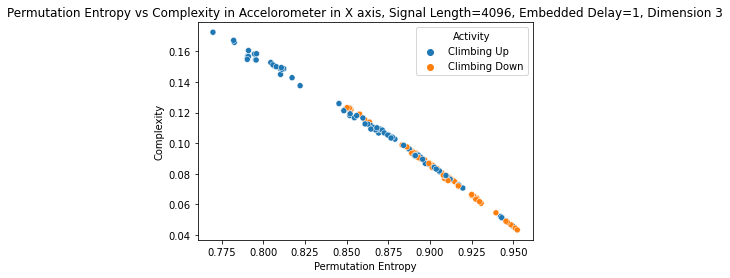

In [ ]:
import seaborn as sns
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_c_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

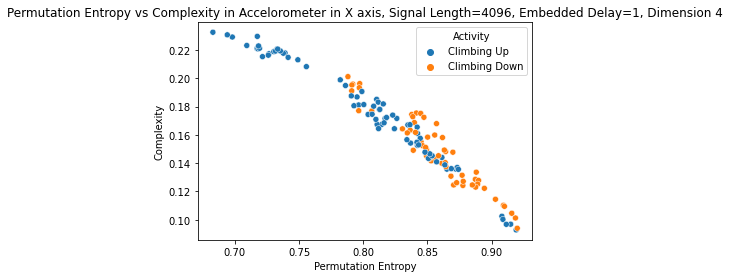

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_c_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

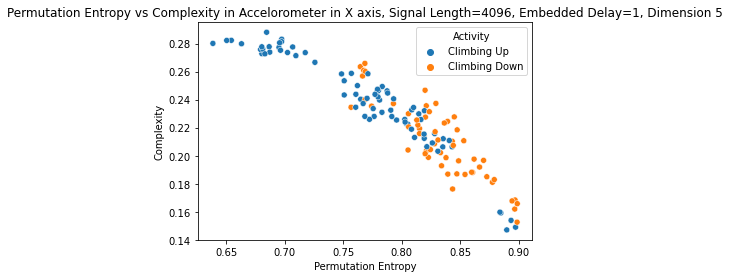

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_c_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

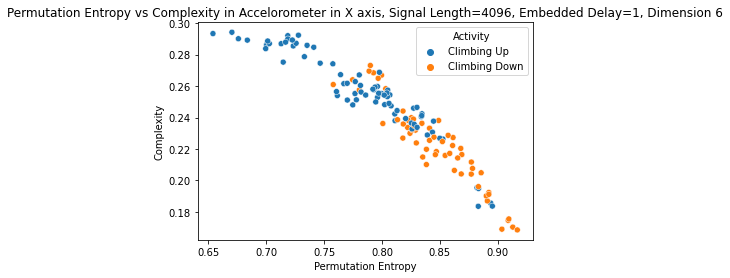

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_c_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

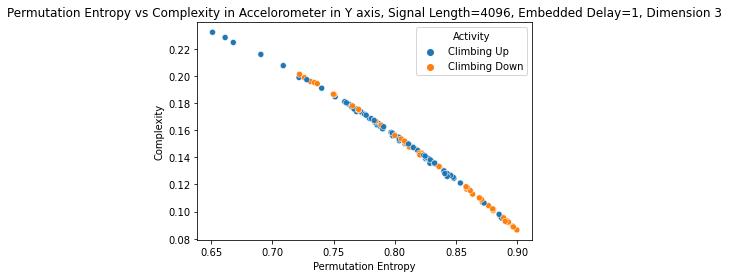

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_c_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

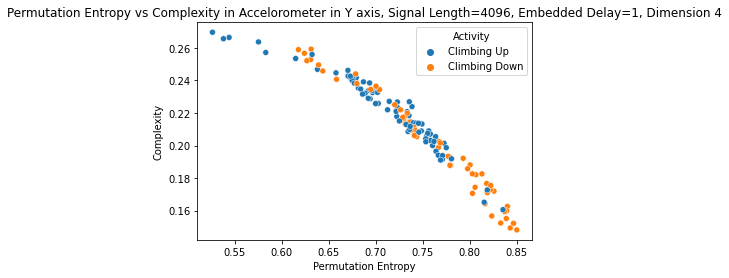

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_c_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

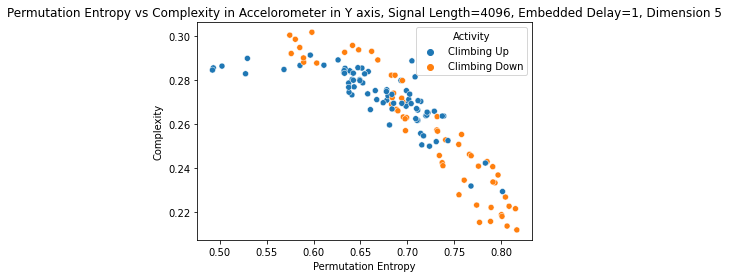

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_c_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

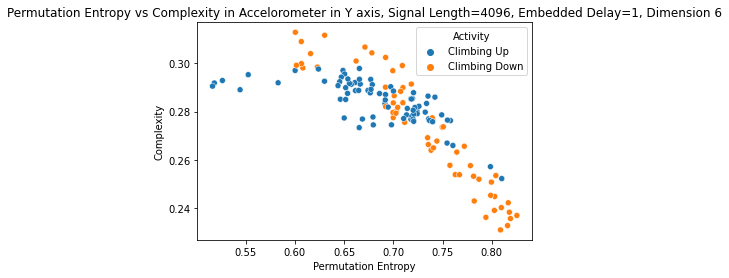

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_c_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

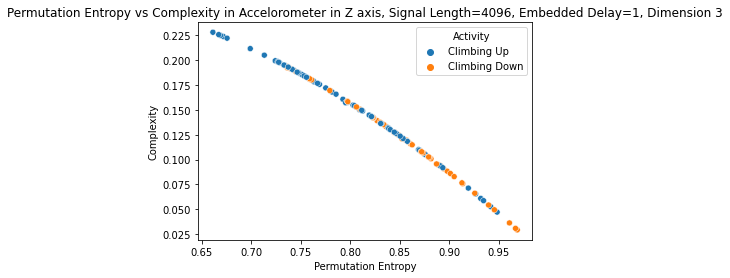

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_c_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

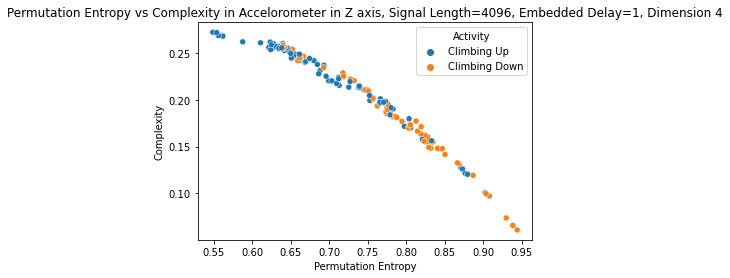

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_c_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

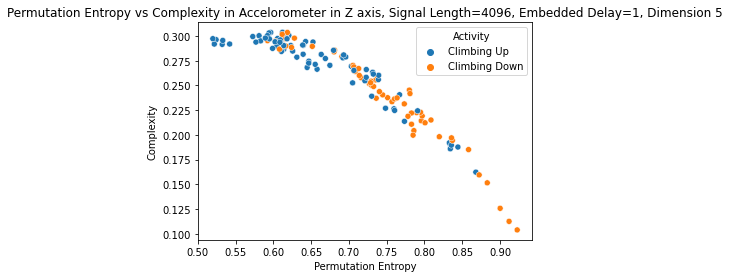

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_c_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

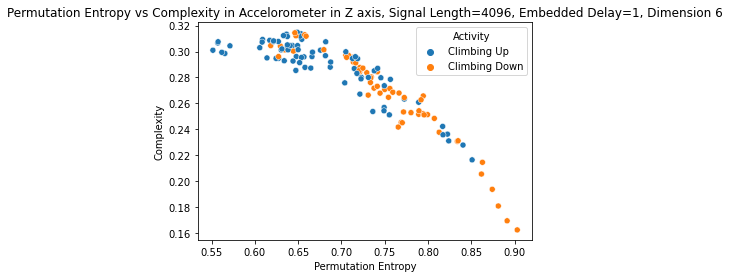

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_c_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

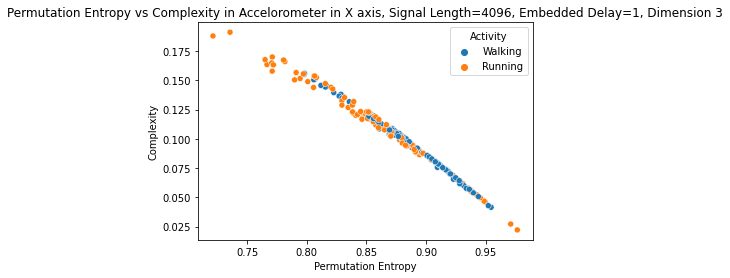

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_wr_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

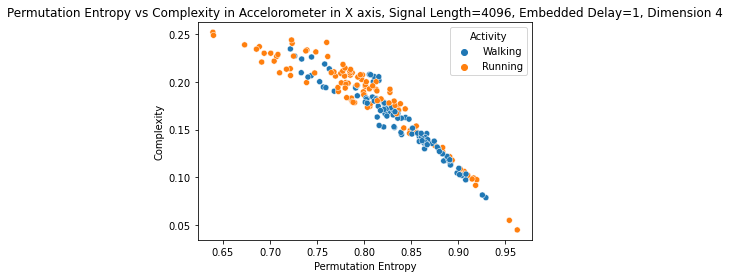

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_wr_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

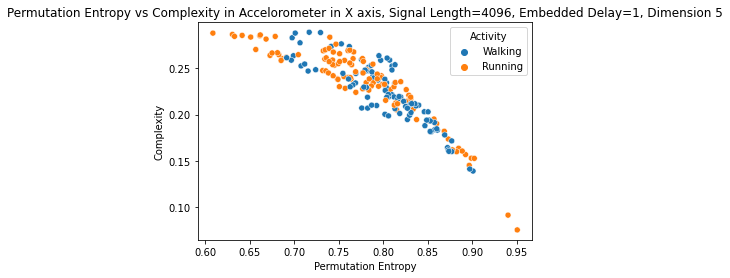

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_wr_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

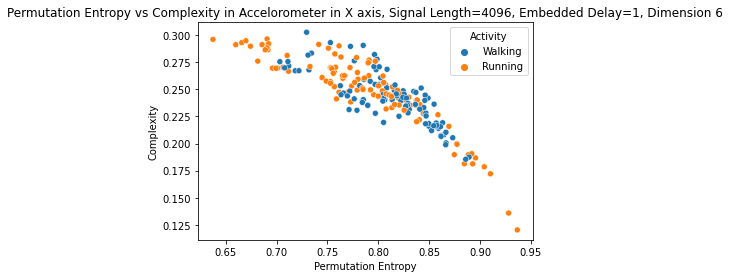

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axis_wr_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

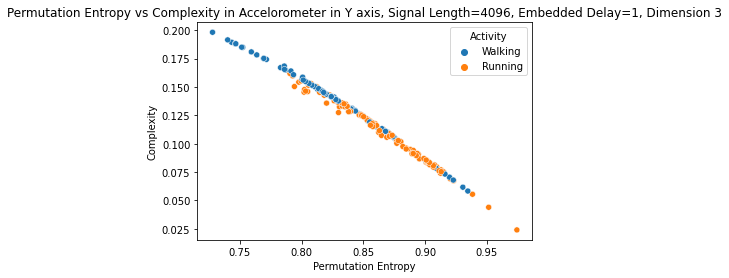

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_wr_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

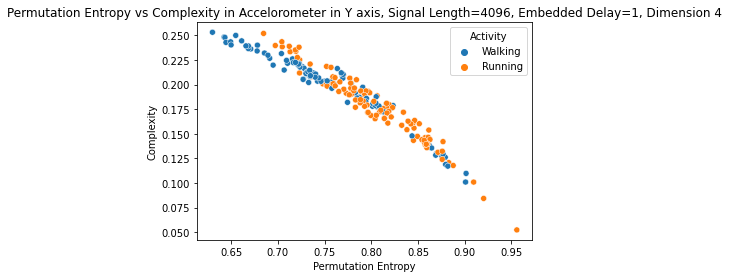

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_wr_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

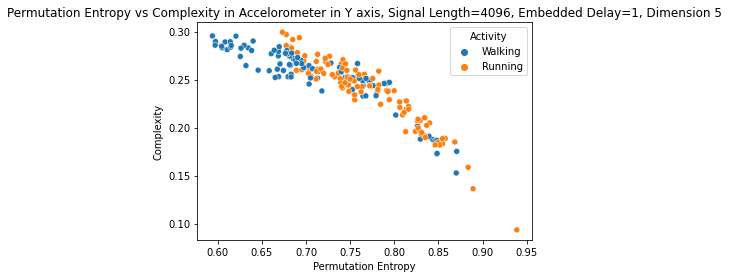

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_wr_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

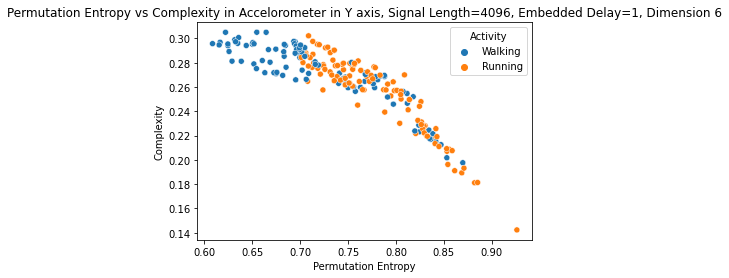

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axis_wr_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1, Dimension 6")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 3')

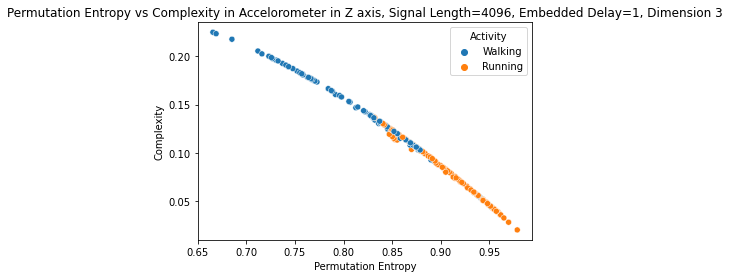

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_wr_1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 3")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 4')

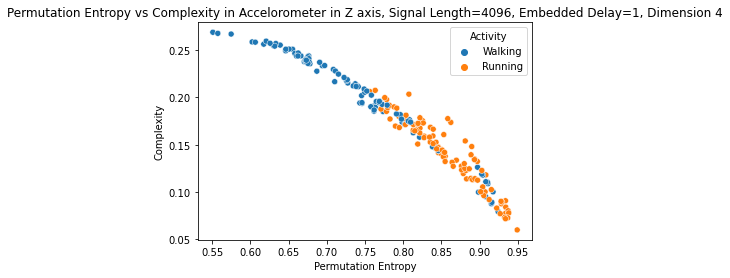

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_wr_2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 4")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 5')

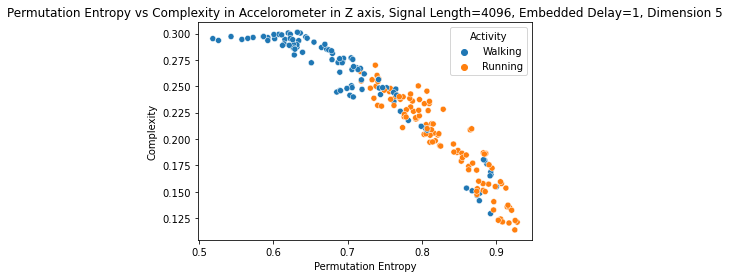

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_wr_3)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 5")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 6')

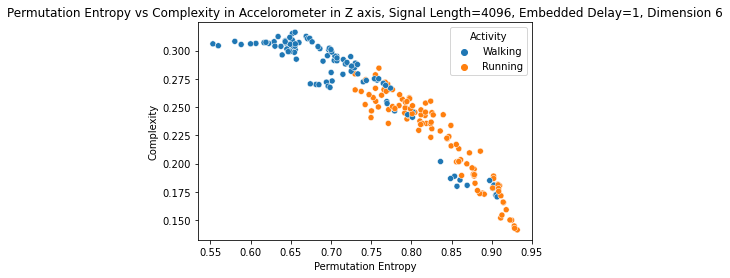

In [ ]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axis_wr_4)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1, Dimension 6")